# Linear algebra in color space
NEURO 545 Wi2023 Fred Rieke <br>
Vyom Raval<br>
Mon, Jan 9, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline

In [2]:
str_conespectra = '/Users/riekelabbackup/Desktop/Vyom/Exercises/545/ColorSpaces/ConeSpectra.mat'
str_monitorspectra = '/Users/riekelabbackup/Desktop/Vyom/Exercises/545/ColorSpaces/MonitorSpectra.mat'

cone_spec = loadmat(str_conespectra)
mon_spec = loadmat(str_monitorspectra)

In [3]:
ConeSpectra = cone_spec['ConeSpectra']
MonitorSpectra = mon_spec['MonitorSpectra']

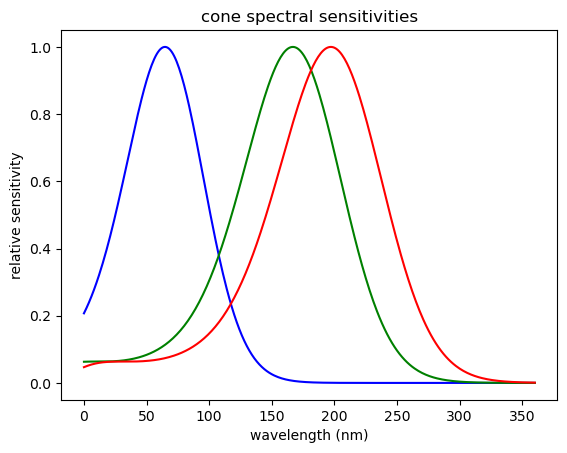

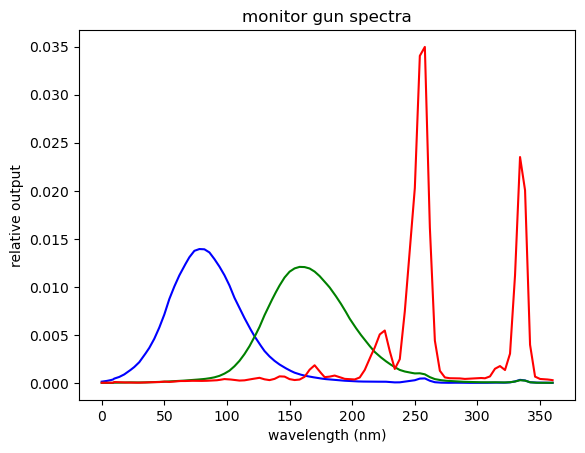

In [4]:
plt.figure()
plt.plot(ConeSpectra[:, 3], 'b')
plt.plot(ConeSpectra[:, 2], 'g')
plt.plot(ConeSpectra[:, 1], 'r')
plt.xlabel('wavelength (nm)');
plt.ylabel('relative sensitivity');
plt.title('cone spectral sensitivities');

plt.figure()
plt.plot(MonitorSpectra[:, 3], 'b')
plt.plot(MonitorSpectra[:, 2], 'g')
plt.plot(MonitorSpectra[:, 1], 'r')
plt.xlabel('wavelength (nm)');
plt.ylabel('relative output');
plt.title('monitor gun spectra');

## Computing conversion

Compute conversion matrix to go from monitor gun space to cone space

In [5]:
arr_P = np.zeros((3, 3))
for idx_c in range(3):
    for idx_m in range(3):
        arr_P[idx_c, idx_m] = (MonitorSpectra[:, idx_m+1] * ConeSpectra[:, idx_c+1]).sum()

In [6]:
arr_P

array([[0.32151222, 0.6626515 , 0.15157224],
       [0.12867089, 0.75527771, 0.25814228],
       [0.01438075, 0.05515407, 0.66216006]])

This is of the format

PbS  PgS  PrS

PbM  PgM  PrM

PbL  PgL  PgL

In [7]:
# From discussion set
# arr_P = np.array([[0.3215, 0.6627, 0.1516],
#                   [0.1287, 0.7553, 0.2581], 
#                   [0.0144, 0.0552, 0.6622]])

Using only specific monitor guns

In [8]:
# Only red monitor gun
arr_P @ np.array([0, 0, 1])

array([0.15157224, 0.25814228, 0.66216006])

In [9]:
# Only blue monitor gun
arr_P @ np.array([1, 0, 0])

array([0.32151222, 0.12867089, 0.01438075])

## Computing inverse

In [10]:
arr_inv_P = np.linalg.inv(arr_P)
arr_inv_P

array([[ 4.78007377, -4.23449986,  0.55662818],
       [-0.80168573,  2.07299909, -0.62464565],
       [-0.03703757, -0.08070415,  1.5501494 ]])

In [11]:
def cone_iso_vector(idx_cone: int, arr_inv_P: np.ndarray):
    cone_unit_vector = np.zeros(3)
    cone_unit_vector[idx_cone] = 1

    return arr_inv_P@cone_unit_vector

In [12]:
cone_iso_vector(1, arr_inv_P)

array([-4.23449986,  2.07299909, -0.08070415])

In [13]:
cone_iso_vector(2, arr_inv_P)

array([ 0.55662818, -0.62464565,  1.5501494 ])